In [2]:
import torch
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:

## visualize masks with more than one channels.
def one_hot_to_rgb(layout_pred, colors, num_classes):
    one_hot = layout_pred[:, :num_classes, :, :]
    one_hot_3d = torch.einsum('abcd,be->aecd', [one_hot, colors])
    one_hot_3d *= (255.0 / one_hot_3d.max())
    return one_hot_3d


def one_hot_3d_to_rgb(layout_3d, objs, obj_to_img,  colors):
    """Convert 3-dim layout to RGB mode for visualization.

    Args:
        layout_3d (Tensor[float]): GT layout, O*H*W.
        obj_to_img (tensor[long]): Specify which image H*W belongs to. O*1
        objs (tensor[long]): labels, O*1
        colors (tensor[float]): O*3 range in (0,256)
    Return:
        res(tensor): N*3*H*W, colorized layouy.
    """
    objs = objs.long()
    obj_to_img = obj_to_img.long()
    layout_3d = layout_3d.float()
    colors = colors.float()
    split_group = list(Counter(obj_to_img.tolist()).values())
    # split objs and layout according to obj_to_img, so that each split is belonging to an img.
    layouts_splits = layout_3d.split(split_group)
    objs_splits = objs.split(split_group)
    res = []
    for layout, obj in zip(layouts_splits, objs_splits):
        color = colors[obj]
        layout_rgb = torch.einsum("ohw,oc->chw", [layout, color])
        res.append(layout_rgb)

    res = torch.stack(res, dim=0)
    res *= (255.0 / res.max())
    return res

In [4]:
a1 = torch.zeros(256, 256, dtype=torch.uint8)
a1[0:64] = 255
a2 = torch.zeros_like(a1)
a2[90:128] = 255
a3 = torch.zeros_like(a1)
a3[160:200] = 255
a4 = torch.zeros_like(a1)
a4[220:256] = 255

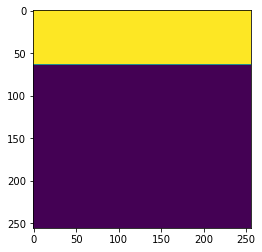

In [6]:
plt.imshow(a1)
plt.show()

In [10]:
layout = torch.stack([a1,a2,a3,a4], dim=0)
print(layout.shape)

torch.Size([4, 256, 256])


In [11]:
colors = torch.randint(256, (4,3))

In [21]:
layout_rgb = torch.einsum("ohw,oc->hwc", layout.float(), colors.float())
layout_rgb /= layout_rgb.max()


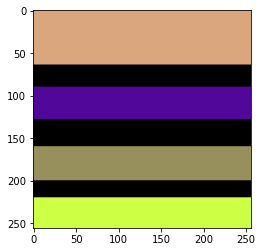

In [22]:
plt.figure()
plt.imshow(layout_rgb)
plt.show() ## plt.imshow() show float in range[0,1]

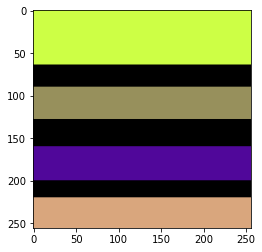

In [26]:
layout2 = torch.stack([a4,a3,a2,a1], dim=0)
layout_rgb2 = torch.einsum("ohw,oc->hwc", layout2.float(), colors.float())
layout_rgb2 /= layout_rgb2.max()
plt.imshow(layout_rgb2)
plt.show()## 特定的通道使用特定的颜色显示。

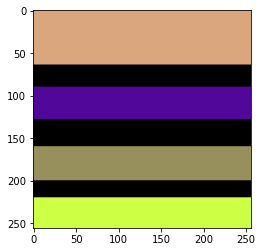

In [27]:
## one_hot_to_rgb
layout_4d = layout.unsqueeze(0)
layout_4d_rgb = torch.einsum('abcd,be->aecd',layout_4d.float(), colors.float())
layout_4d_rgb /= layout_4d_rgb.max()
layout_4d_rgb = layout_4d_rgb.squeeze()
plt.imshow(layout_4d_rgb.permute(1,2,0))
plt.show()